In [1]:
import pandas as pd
import json

In [2]:
data_path = 'data_dir/train-test-split-v2.json'

In [3]:
data = pd.read_json(data_path,lines=True)


What does our data look like?


In [4]:
data.iloc[0]

steam_id                                       76561198046794976
games          [{'appid': 205790, 'name': 'Dota 2 Test', 'pla...
valid_games    [{'appid': 570, 'name': 'Dota 2', 'playtime_fo...
train_games    [{'appid': 214420, 'name': 'Gear Up', 'playtim...
Name: 0, dtype: object

In [7]:
pd.DataFrame(data.iloc[0]['games']).sort_values('playtime_forever', ascending=False)[['name', 'playtime_forever']]

,name,playtime_forever
9,Dota 2,71638
6,Paladins,49656
3,Counter-Strike: Global Offensive,2493
8,Team Fortress 2,1086
4,SMITE,540
2,Left 4 Dead 2,9
1,Gear Up,1
0,Dota 2 Test,0
5,Smite - Public Test,0
7,Paladins - Public Test,0


# Number of users

In [8]:
num_users = len(data)
num_users

7521

# Number of games

In [9]:
games = set()
for _, user in data.iterrows():
    for g in user['games']:
        games.add(g['name'])
num_games = len(games)
num_games

5400

# Number of Ratings

In [10]:
num_ratings = 0
for _, user in data.iterrows():
    num_ratings += len(user['games'])
num_ratings

1622810

# Sparseness

In [13]:
num_ratings / (num_users * num_games)

0.03995750171125786

# Most played games

In [15]:
from collections import Counter
playtime=Counter()
game_counts = Counter()
for _, user in data.iterrows():
    for g in user['games']:
        playtime[g['name']] += g['playtime_forever']
        game_counts[g['name']] += 1
pd.DataFrame({"playtime": playtime.most_common(20), 'installs': game_counts.most_common(20)})

,playtime,installs
0,"(Counter-Strike: Global Offensive, 401097021)","(Counter-Strike: Global Offensive, 6846)"
1,"(Dota 2, 352996386)","(PAYDAY 2, 4689)"
2,"(Team Fortress 2, 69303185)","(Dota 2 Test, 4673)"
3,"(PLAYERUNKNOWN'S BATTLEGROUNDS, 58904972)","(Left 4 Dead 2, 4638)"
4,"(Rocket League, 42236641)","(Team Fortress 2, 4589)"
5,"(Counter-Strike: Source, 40726125)","(Dota 2, 4549)"
6,"(Garry's Mod, 37362622)","(Garry's Mod, 3949)"
7,"(Rust, 33807746)","(PLAYERUNKNOWN'S BATTLEGROUNDS, 3878)"
8,"(Counter-Strike, 30013780)","(Unturned, 3665)"
9,"(Arma 3, 29001365)","(Portal 2, 3620)"


# Users with most games/ most played

In [16]:
playtime = Counter()
game_counts = Counter()
for _, user in data.iterrows():
    for g in user['games']:
        playtime[user['steam_id']] += g['playtime_forever']
        game_counts[user['steam_id']] += 1
pd.DataFrame({"playtime": playtime.most_common(100), 'installs': game_counts.most_common(100)})

,playtime,installs
0,"(76561198393005712, 24812201)","(76561198047578752, 1402)"
1,"(76561198076423200, 16846021)","(76561198015132768, 1401)"
2,"(76561198447102720, 9514700)","(76561197992345392, 1380)"
3,"(76561198140567424, 8900687)","(76561198000640032, 1379)"
4,"(76561198046329296, 6452274)","(76561198044057984, 1358)"
...,...,...
95,"(76561198000002112, 990775)","(76561197972204496, 1143)"
96,"(76561198048688928, 989346)","(76561198001975504, 1141)"
97,"(76561197964596432, 988705)","(76561197976653392, 1138)"
98,"(76561198025746352, 983251)","(76561197993738272, 1137)"


In [16]:
import seaborn as sns
sns.set()
sns.set_style('white')
%matplotlib inline
import matplotlib.pyplot as plt

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


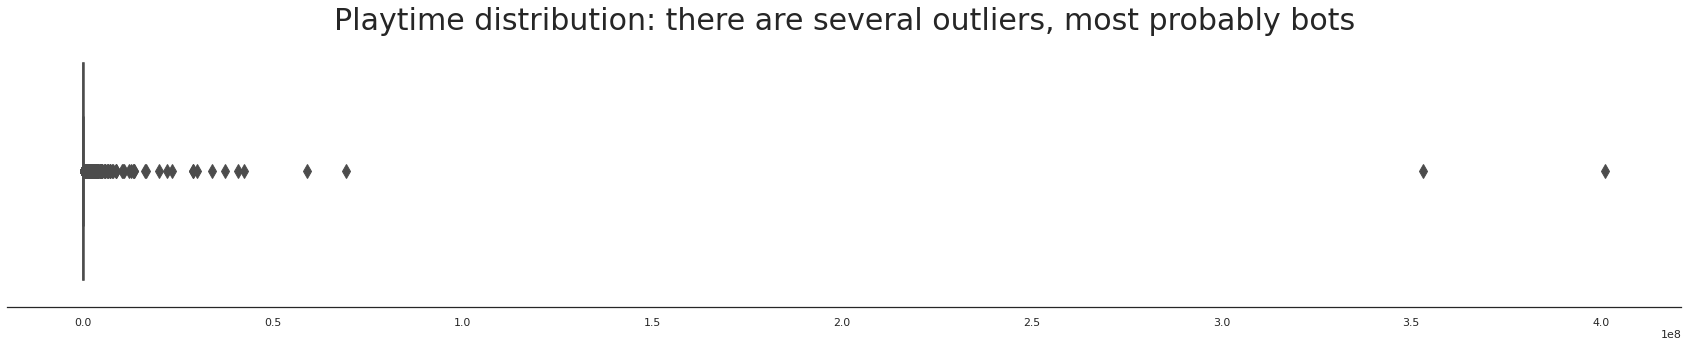

In [21]:
fig, ax = plt.subplots(figsize=(30,5))
sns.despine(fig, left=True)
#sns.distplot(list(playtime.values()))
sns.boxplot(list(playtime.values()), orient='h',fliersize=10);
ax.set_title('Playtime distribution: there are several outliers, most probably bots',size=30);

In [22]:
pd.Series(game_counts).describe()

count    5400.000000
mean      300.520370
std       430.630764
min        50.000000
25%        84.000000
50%       152.000000
75%       331.000000
max      6846.000000
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


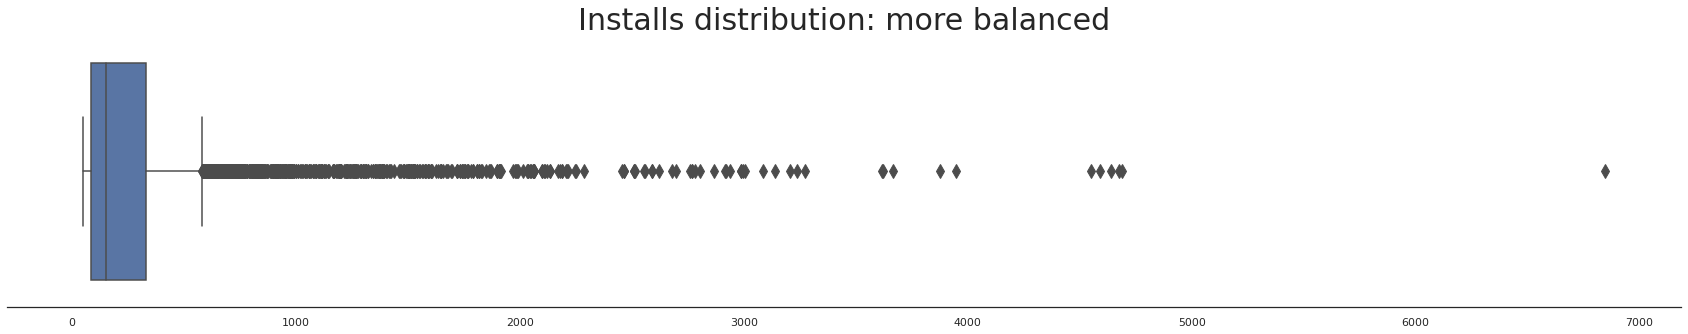

In [23]:
fig, ax = plt.subplots(figsize=(30,5))
sns.despine(fig, left=True)
#sns.distplot(list(playtime.values()))
sns.boxplot(list(game_counts.values()), orient='h', whis=1,fliersize=10);
ax.set_title('Installs distribution: more balanced',size=30);